**Trabalho 1 - Aprendizado de Máquina**

Universidade Federal do Rio de Janeiro

Departamento de Métodos Estatísticos

Nome: Igor Nunes Patricio

DRE: 116145754

In [1]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt

**Lendo os dados**

In [ ]:
# Lendo os dados
df = pd.read_csv("winequality-red.csv")

# "cabeça" dos dados
df.head()

# Separando as variáveis input e output

# Input
nome_colunas_input = df.columns[0:len(df.columns)-1]
X = df[nome_colunas_input]

# Output
y = df['quality']



**Análise Exploratória**

In [ ]:
# Verificando que não existem outliers
df.isnull().values.any()

# Estatísticas dos dados
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


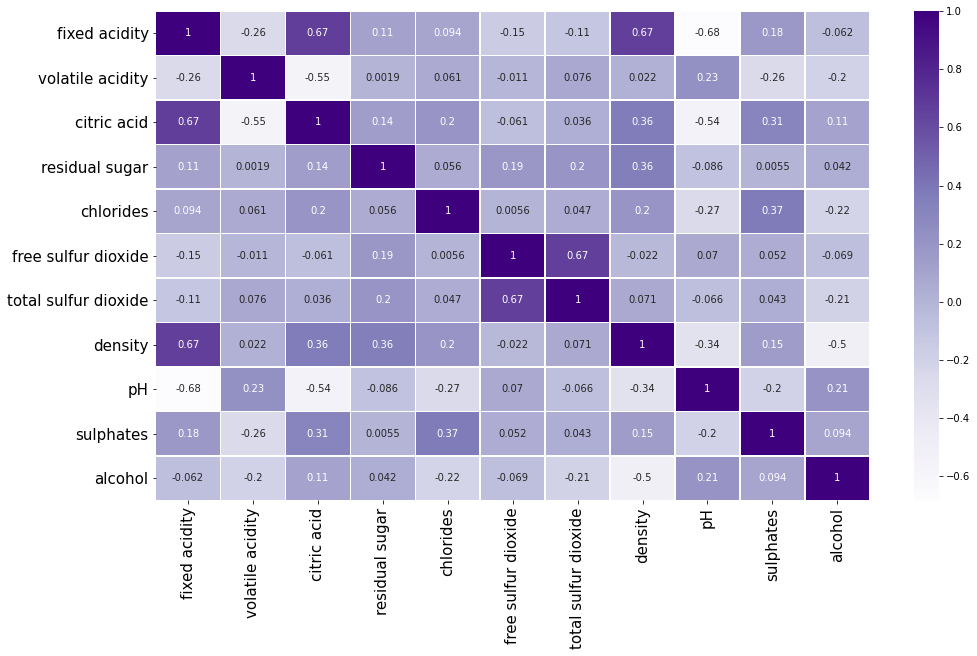

In [ ]:
# Analisando variáveis correlacionadas
plt.figure(figsize = (16,9))
correlacoes = sns.heatmap(X.corr(),linewidths=.5,cmap='Purples',annot = True)
correlacoes.tick_params(labelsize=15)

Como já era de se esperar algumas variáveis tem correlações altas. Por exemplo: citric acidy e fixed acid possuem correlação linear de 0.67, fixed acidity e pH tem correlação linear de -0.68 . Nesse caso, o Classificador de Bayes Ingênuo pode não ser tão bom visto que uma das hipóteses para utilizá-lo é de independência entre as variáveis. Nesse contexto, a utilização do LDA e do QDA pode fazer mais sentido utilizando todas as variáveis, já que elas levam em consideração a matriz de correlação. No entanto, LDA e QDA assumem que as observações seguem uma normal multivariada, o que pode não ser verdade. 

**Olhando para o balanceamento do conjunto de dados**


In [ ]:
# Quantidade de dados por valor de quality
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Se classificarmos o vinho como bom se ele tiver quality maior ou igual a 7, os dados ficarão desbalanceados e para tentar contornar esse problema a amostragem deverá ser estratificada, porém se classificarmos o vinho como bom se ele tiver quality maior ou igual a 6, os dados ficarão mais balanceados e não precisaremos nos preocupar em fazer amostragem estratificada. Optei por classificar o vinho como bom se quality é maior ou igual a 7 e, assim, farei amostragem estratificada.

ruim:  1382
bom:  217
Porcentagem de erro se classificarmos todos como ruins:  0.1357098186366479


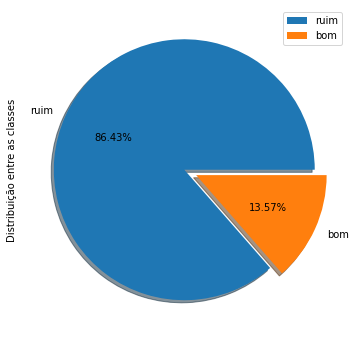

In [ ]:
# Classificando em 'ruim'= 0 e 'bom' = 1 com limiar de quality >=7
y_br = []
for i in y:
  if i>=7:
    y_br.append('bom')
  elif i<7:
    y_br.append('ruim')

y_br = pd.Series(y_br)

print('ruim: ',len(y_br[y_br=='ruim']))
print('bom: ',len(y_br[y_br=='bom']))
print('Porcentagem de erro se classificarmos todos como ruins: ',len(y_br[y_br=='bom'])/len(y_br))

y_br.value_counts().plot(kind = 'pie', explode = [0, 0.1],figsize = (6, 6), autopct = '%1.2f%%', shadow = True)
plt.ylabel('Distribuição entre as classes')
plt.legend(['ruim', 'bom'])
plt.show()

Os dados são muito desbalanceados, sendo a quantidade de vinhos classificados como 'ruim' igual a 1382 e classificados como 'bom' igual a 217. Assim, ao usarmos cada método, será necessário separar em dados de treino e teste com estratificação. Além disso, a taxa de vinhos classifcados como bons é de aproximadamente 13,57% do total de vinhos. Sendo assim, buscamos um classificador que tenha erro menor do que essa porcentagem, já que se classificarmos todos os vinhos como ruins estamos errando 13,57%.

In [ ]:
# Fazendo cópia das variáveis input com todas as colunas e da variável output bom ou ruim
X_todas = X.copy()
y_br_todas = y_br.copy()

In [ ]:
# Normalizando utilizando standard scaler
from sklearn.preprocessing import StandardScaler

X = X_todas.values 
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)
X_normalizado = pd.DataFrame(X_normalizado,columns = X_todas.columns)
X_normalizado

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


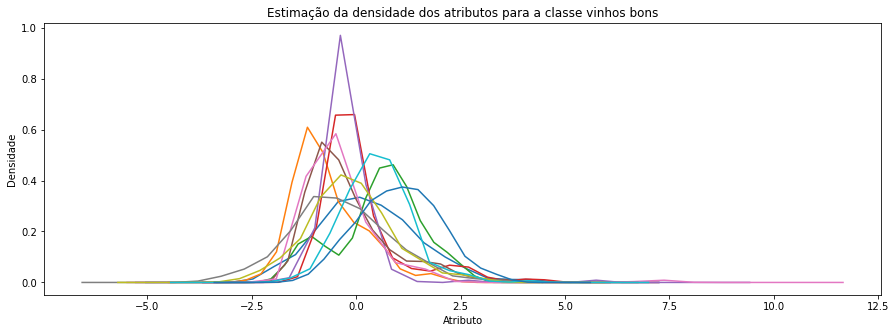

In [ ]:
# Verificando normalidade graficamente para a classe dos vinhos bons  (após standardscaler)
X_normalizado[y_br=='bom'].iloc[:,:].plot(kind = 'kde', ind = 25, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe vinhos bons')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

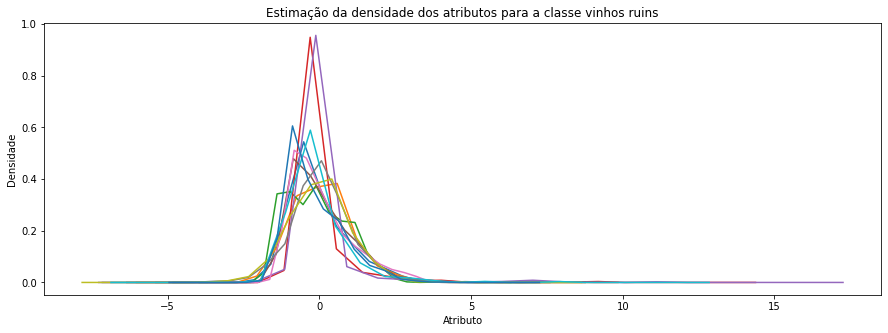

In [ ]:
# Verificando normalidade para classe dos vinhos ruins (após standardscaler)
X_normalizado[y_br=='ruim'].iloc[:,:].plot(kind = 'kde', ind = 25, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe vinhos ruins')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

Não parecem ser normais por classe, principalmente a classe dos vinhos bons, tentando uma transformação quantílica para ajustar a normalidade.

In [ ]:
# Transformação quantílica
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
X_tq = pd.DataFrame(qt.fit_transform(X_normalizado),columns = X_todas.columns)

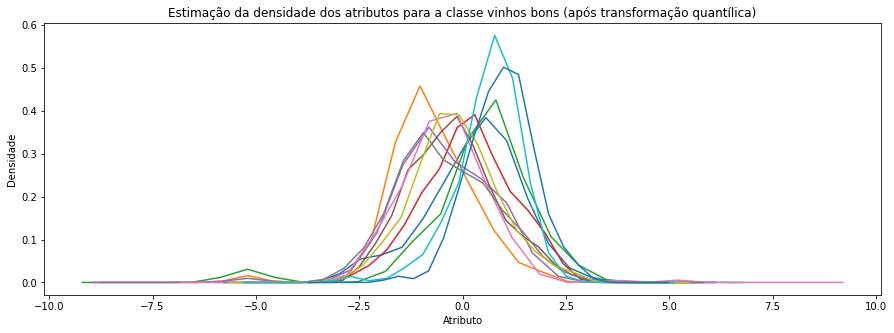

In [ ]:
# Verificando normalidade para classe dos vinhos bons após transformação quantílica
X_tq[y_br=='bom'].iloc[:,:].plot(kind = 'kde', ind = 25, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe vinhos bons (após transformação quantílica)')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

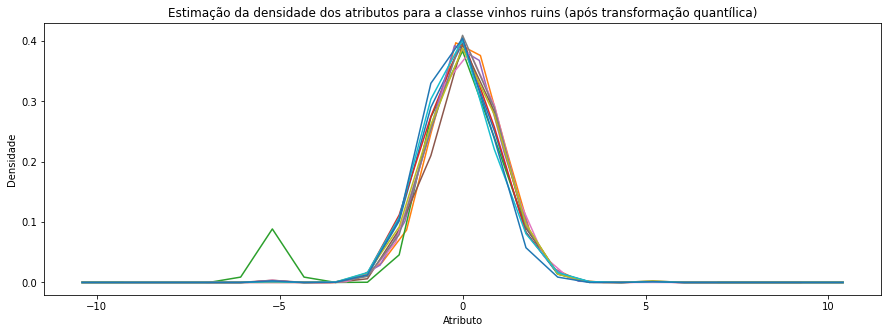

In [ ]:
# Verificando normalidade para classe dos vinhos ruins após transformação quantílica
X_tq[y_br=='ruim'].iloc[:,:].plot(kind = 'kde', ind = 25, legend = False, figsize = (15, 5))
plt.title('Estimação da densidade dos atributos para a classe vinhos ruins (após transformação quantílica)')
plt.xlabel('Atributo')
plt.ylabel('Densidade')
plt.show()

Agora as classes parecem muito mais com distribuições normais, principalmente a classe dos vinhos ruins. (Fazendo vista grossa para aquele pico por volta do -5).

**O que farei**
Primeiro separarei os dados em Validação e Teste de forma proporcional às classes e dentro do conjunto de validação farei validação cruzada com estratificação e pegarei o modelo que melhor performou segundo a métrica 'proporção de vinhos bons corretamente classificados' para os casos Bayes Ingênuo Gaussiano, LDA e QDA (com e sem variáveis correlacionadas) e irei compará-los a partir dessa métrica calculada nos dados de Teste. 
Obs: a métrica 'proporção de vinhos bons corretamente classificados' não será a única métrica analisada, também olharei para AUC e para o erro/acurácia para que não ocorra extremos como por exemplo: classificar todos os vinhos como bons e, com isso, a métrica avaliada seria 100%, mas a acurácia seria baixíssima.

**Utilizando todas as variáveis**

In [ ]:
# importando função pra splitar os dados em validação e teste
from sklearn.model_selection import train_test_split

# dividindo os dados entre treino+validação e teste
X, X_test_Teste, y_br, y_br_test_Teste = train_test_split(X_tq, y_br_todas, test_size=0.1, random_state=42, stratify = y_br_todas)

Classificador do Bayes Ingênuo Gaussiano


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold

Modelo 0 : AUC:  0.8416    Erro = 1 - acurácia: 0.1493 Proporção de vinhos bons corretamente classificados : 0.5897
Modelo 1 : AUC:  0.8801    Erro = 1 - acurácia: 0.1597 Proporção de vinhos bons corretamente classificados : 0.5897
Modelo 2 : AUC:  0.8281    Erro = 1 - acurácia: 0.1458 Proporção de vinhos bons corretamente classificados : 0.6154
Modelo 3 : AUC:  0.8743    Erro = 1 - acurácia: 0.1458 Proporção de vinhos bons corretamente classificados : 0.7436
Modelo 4 : AUC:  0.8929    Erro = 1 - acurácia: 0.1185 Proporção de vinhos bons corretamente classificados : 0.5897


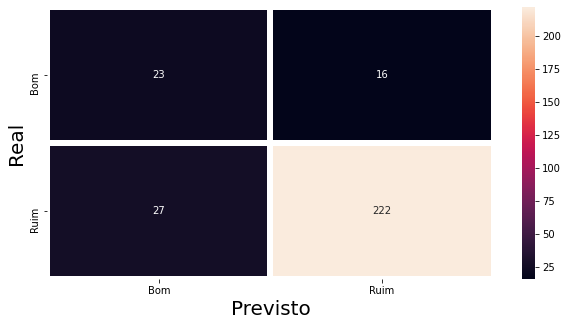

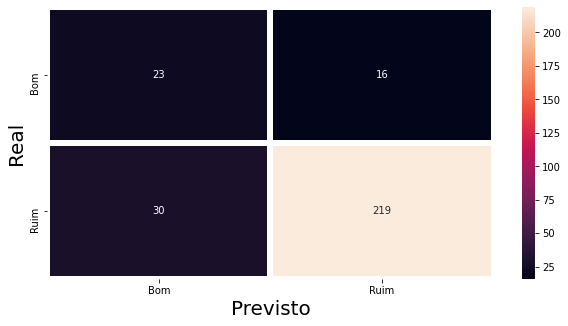

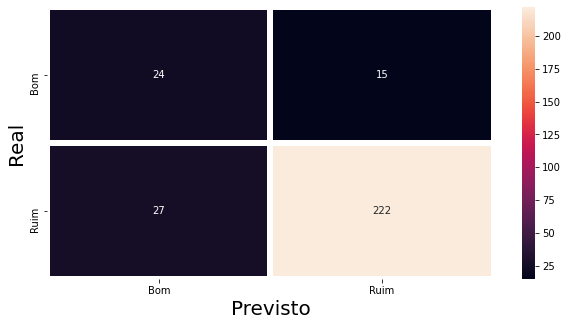

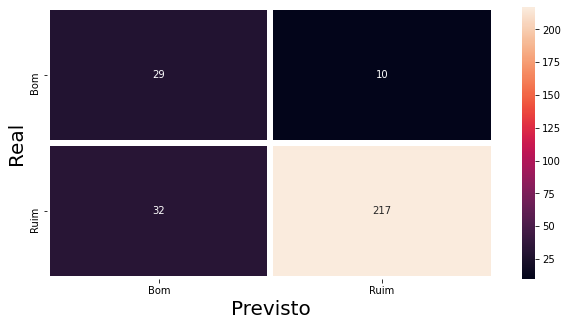

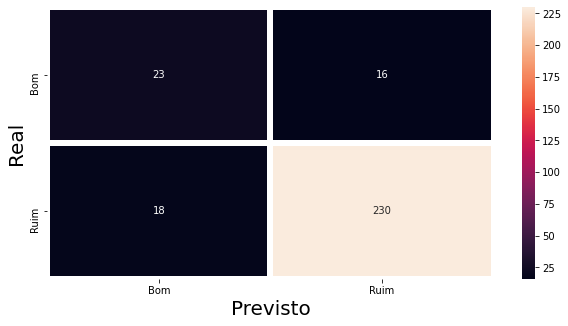

In [ ]:
# Importando métricas
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Fazendo com estratificação com 5 grupos
skf = StratifiedKFold(n_splits=5)
i=0
# Dividindo os dados proporcionalmente as classes
lista_modelos_NB = []
for train_index, test_index in skf.split(X, y_br):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_br_train, y_br_test = y_br.iloc[train_index], y_br.iloc[test_index]
  clf = GaussianNB()
  lista_modelos_NB.append(clf.fit(X_train,y_br_train))
  plt.figure(figsize = (10,5))
  cf_matrix = confusion_matrix(y_br_test,clf.predict(X_test))
  sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
  plt.xlabel('Previsto',fontsize=20)
  plt.ylabel('Real',fontsize=20)
  print('Modelo',i,': AUC: ',round(roc_auc_score(y_br_test, clf.predict_proba(X_test)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test, clf.predict(X_test)),4),
        'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))
  i+=1
  

melhor_NBGaussiano = lista_modelos_NB[3]


Como visto acima, todos os modelos tiveram erros próximos do erro se classificássemos todos os vinhos como ruins. No entanto, suponha que por algum motivo queremos melhores estimativas para os vinhos bons e que como critério de desempate para essa métrica usaremos a acurácia. Sendo assim, a acurácia não será necessariamente a melhor métrica para averiguar essa informação. Para isso, podemos calcular a proporção de vinhos bons que realmente foram classificados como bons. Nesse caso ficaríamos com o modelo 3, visto que ele obteve melhor resultado 0.7436 pra essa proporção.

Classificador LDA

Modelo 0 : AUC:  0.8508    Erro = 1 - acurácia: 0.1285 Proporção de vinhos bons corretamente classificados : 0.359
Modelo 1 : AUC:  0.8696    Erro = 1 - acurácia: 0.1424 Proporção de vinhos bons corretamente classificados : 0.3333
Modelo 2 : AUC:  0.8728    Erro = 1 - acurácia: 0.125 Proporção de vinhos bons corretamente classificados : 0.3333
Modelo 3 : AUC:  0.8821    Erro = 1 - acurácia: 0.1319 Proporção de vinhos bons corretamente classificados : 0.4103
Modelo 4 : AUC:  0.8939    Erro = 1 - acurácia: 0.115 Proporção de vinhos bons corretamente classificados : 0.359


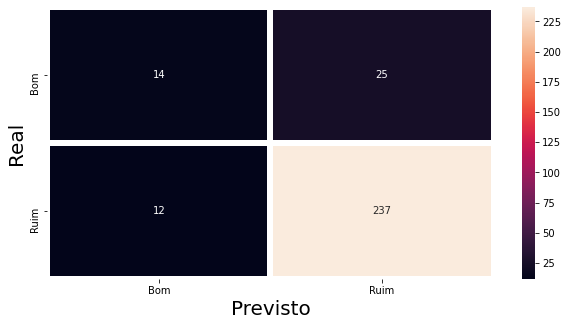

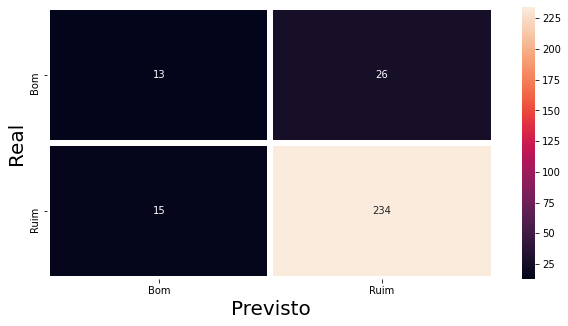

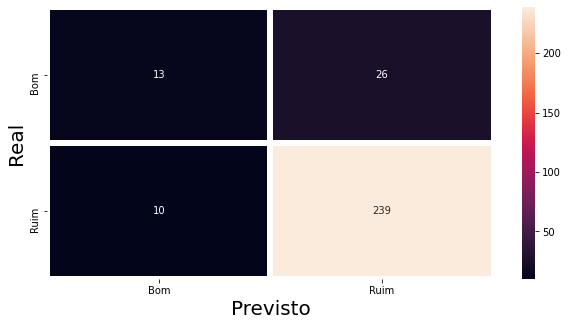

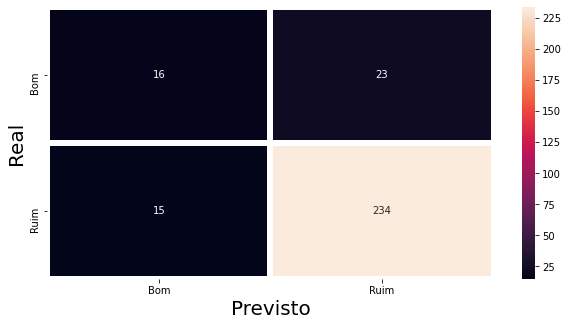

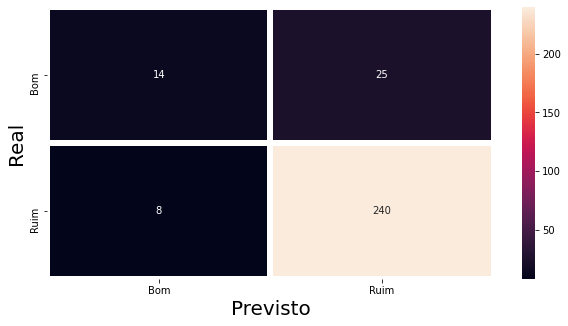

In [ ]:
# Importando LDA e QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Fazendo com estratificação com 5 grupos
skf = StratifiedKFold(n_splits=5)
i=0
# Dividindo os dados proporcionalmente as classes
lista_modelos_LDA = []
for train_index, test_index in skf.split(X, y_br):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_br_train, y_br_test = y_br.iloc[train_index], y_br.iloc[test_index]
  clf = LinearDiscriminantAnalysis(store_covariance = True)
  lista_modelos_LDA.append(clf.fit(X_train,y_br_train))
  plt.figure(figsize = (10,5))
  cf_matrix = confusion_matrix(y_br_test,clf.predict(X_test))
  sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
  plt.xlabel('Previsto',fontsize=20)
  plt.ylabel('Real',fontsize=20)
  print('Modelo',i,': AUC: ',round(roc_auc_score(y_br_test, clf.predict_proba(X_test)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test, clf.predict(X_test)),4),
        'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))
  i+=1
  



melhor_LDA = lista_modelos_LDA[3]

Pode-se perceber que a acurácia para o LDA foi, em média, mais alta, e consequentemente o erro, em média, foi menor do que o modelo do bayes ingênuo gaussiano, porém a proporção de vinhos bons corretamente classificados foi bem abaixo do bayes ingênuo gaussiano. Nota-se que o modelo 3 teve o melhor desempenho nesse caso, com proporção de vinhos bons corretamente classificados de 0.4103, melhor entre os LDA treinados mesmo não tendo a menor acurácia, mas ainda bem abaixo da melhor proporção de vinhos bons corretamente classificados do bayes ingênuo gaussiano.

Classificador QDA


Modelo 0 : AUC:  0.7998    Erro = 1 - acurácia: 0.1528 Proporção de vinhos bons corretamente classificados : 0.4872
Modelo 1 : AUC:  0.8538    Erro = 1 - acurácia: 0.1285 Proporção de vinhos bons corretamente classificados : 0.5385
Modelo 2 : AUC:  0.8483    Erro = 1 - acurácia: 0.1389 Proporção de vinhos bons corretamente classificados : 0.4615
Modelo 3 : AUC:  0.8544    Erro = 1 - acurácia: 0.1285 Proporção de vinhos bons corretamente classificados : 0.5897
Modelo 4 : AUC:  0.9118    Erro = 1 - acurácia: 0.1185 Proporção de vinhos bons corretamente classificados : 0.5897


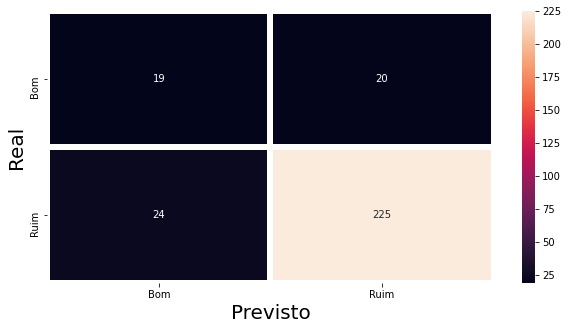

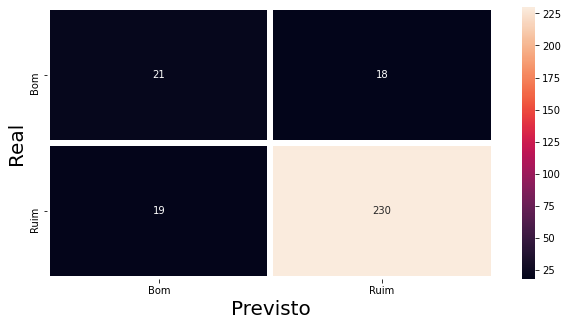

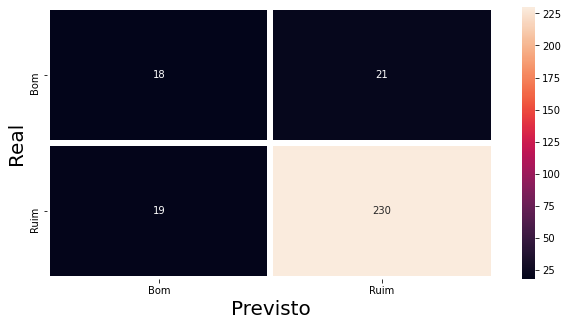

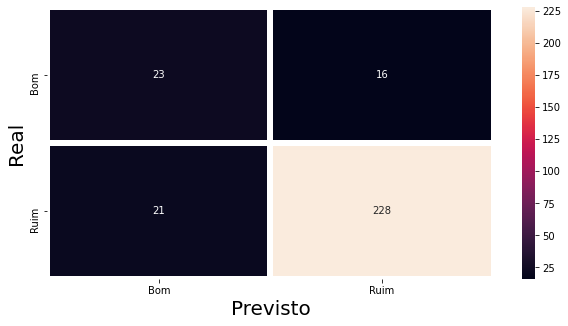

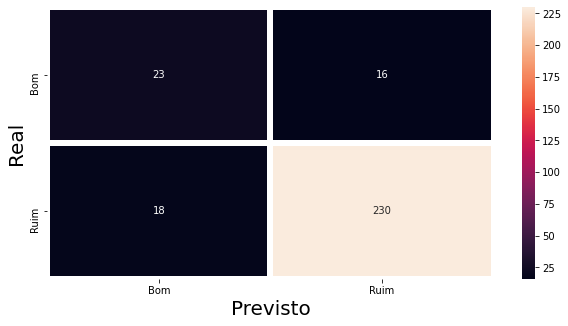

In [ ]:
# Fazendo com estratificação com 5 grupos
skf = StratifiedKFold(n_splits=5)
i=0
# Dividindo os dados proporcionalmente as classes
lista_modelos_QDA = []
for train_index, test_index in skf.split(X, y_br):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_br_train, y_br_test = y_br.iloc[train_index], y_br.iloc[test_index]
  clf = QuadraticDiscriminantAnalysis(store_covariance=True)
  lista_modelos_QDA.append(clf.fit(X_train,y_br_train))
  plt.figure(figsize = (10,5))
  cf_matrix = confusion_matrix(y_br_test,clf.predict(X_test))
  sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
  plt.xlabel('Previsto',fontsize=20)
  plt.ylabel('Real',fontsize=20)
  print('Modelo',i,': AUC: ',round(roc_auc_score(y_br_test, clf.predict_proba(X_test)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test, clf.predict(X_test)),4),
        'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))
  i+=1




melhor_QDA = lista_modelos_QDA[4]


Para o QDA, percebe-se que a melhor proporção de vinhos bons corretamente classificados foi para o modelo 4 com estimativa de 0.5897 e como critério de desempate em relação ao modelo 3 teve menor erro (0.1185). O melhor QDA ficou entre as melhores estimativas pelo LDA e bayes ingênuo gaussiano. 

A comparação entre os modelos Bayes Ingênuo Gaussiano, LDA e QDA feita acima foi preliminar, os resultados acima só serviram para guardarmos o melhor modelo ajustado para cada método. Agora compararemos os três melhores modelos descritos acima entre si usando métricas nos dados de teste.

**Comparando os 3 classificadores entre si nos dados de teste**

Modelo NBG: AUC:  0.8755    Erro = 1 - acurácia: 0.1375 Proporção de vinhos bons corretamente classificados : 0.45454545454545453
Modelo LDA: AUC:  0.9048    Erro = 1 - acurácia: 0.1188 Proporção de vinhos bons corretamente classificados : 0.3181818181818182
Modelo QDA: AUC:  0.8949    Erro = 1 - acurácia: 0.1375 Proporção de vinhos bons corretamente classificados : 0.2727272727272727


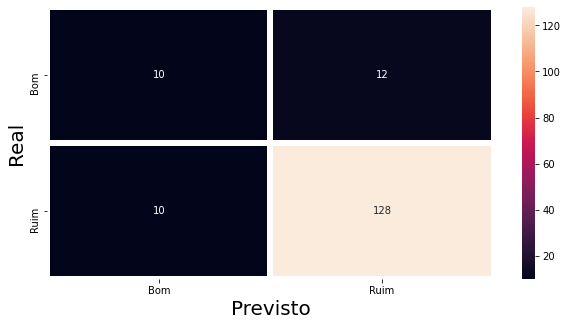

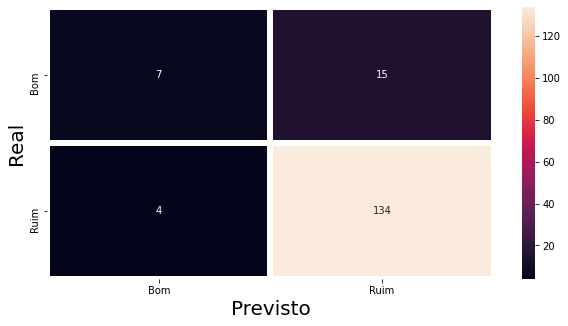

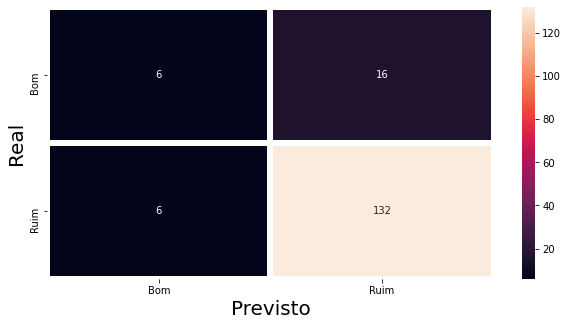

In [ ]:
# Bayes Ingênuo Gaussiano
plt.figure(figsize = (10,5))
cf_matrix_NB = confusion_matrix(y_br_test_Teste,melhor_NBGaussiano.predict(X_test_Teste))
sns.heatmap(cf_matrix_NB,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
plt.xlabel('Previsto',fontsize=20)
plt.ylabel('Real',fontsize=20)
print('Modelo NBG: AUC: ',round(roc_auc_score(y_br_test_Teste, melhor_NBGaussiano.predict_proba(X_test_Teste)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test_Teste, melhor_NBGaussiano.predict(X_test_Teste)),4),
      'Proporção de vinhos bons corretamente classificados :', cf_matrix_NB[0,0]/(cf_matrix_NB[0,0]+cf_matrix_NB[0,1]))

# LDA
plt.figure(figsize = (10,5))
cf_matrix_LDA = confusion_matrix(y_br_test_Teste,melhor_LDA.predict(X_test_Teste))
sns.heatmap(cf_matrix_LDA,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
plt.xlabel('Previsto',fontsize=20)
plt.ylabel('Real',fontsize=20)
print('Modelo LDA: AUC: ',round(roc_auc_score(y_br_test_Teste, melhor_LDA.predict_proba(X_test_Teste)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test_Teste, melhor_LDA.predict(X_test_Teste)),4),
      'Proporção de vinhos bons corretamente classificados :', cf_matrix_LDA[0,0]/(cf_matrix_LDA[0,0]+cf_matrix_LDA[0,1]))


# QDA
plt.figure(figsize = (10,5))
cf_matrix_QDA = confusion_matrix(y_br_test_Teste,melhor_QDA.predict(X_test_Teste))
sns.heatmap(cf_matrix_QDA,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
plt.xlabel('Previsto',fontsize=20)
plt.ylabel('Real',fontsize=20)
print('Modelo QDA: AUC: ',round(roc_auc_score(y_br_test_Teste, melhor_QDA.predict_proba(X_test_Teste)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test_Teste, melhor_QDA.predict(X_test_Teste)),4),
      'Proporção de vinhos bons corretamente classificados :', cf_matrix_QDA[0,0]/(cf_matrix_QDA[0,0]+cf_matrix_QDA[0,1]))



Como pode ser visto, os melhores modelos para cada classificador encontrados na parte de validação resultaram em menores proporções de vinhos bons classificados corretamente quando aplicados nos dados de teste.  Comparando os três classificadores, o bayes ingênuo gaussiano resultou em uma melhor performance nesse sentido, acertando 45% dos dados de teste. Assim, ficaríamos com ele caso esses fossem os únicos modelos a serem testados.

**Utilizando somente as variáveis não correlacionadas**

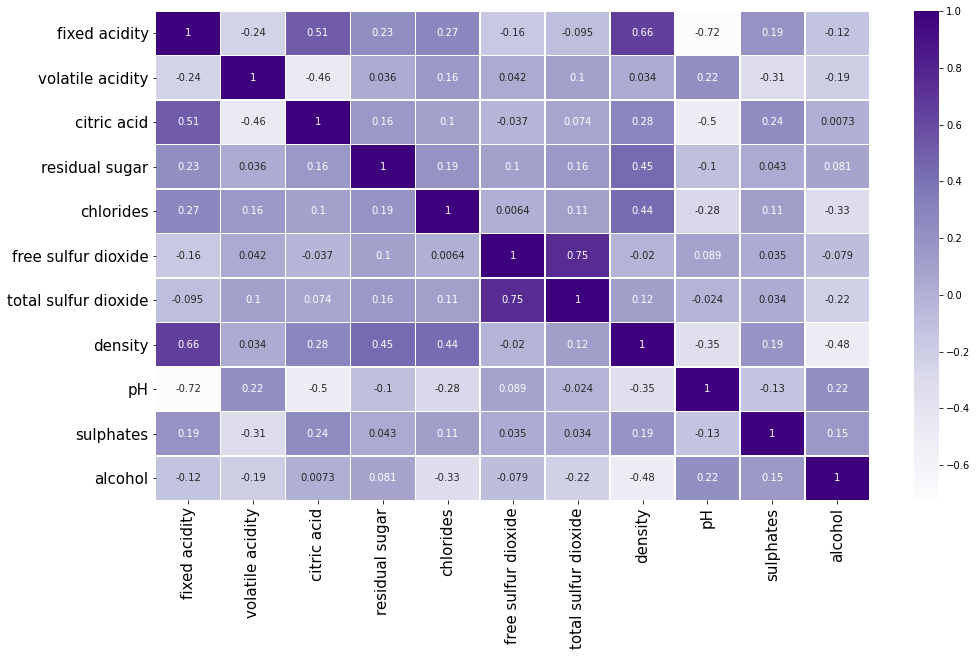

In [ ]:
# Analisando variáveis correlacionadas
plt.figure(figsize = (16,9))
correlacoes = sns.heatmap(X.corr(),linewidths=.5,cmap='Purples',annot = True)
correlacoes.tick_params(labelsize=15)

Olhando mais uma vez a correlação entre as variáveis, percebemos que as variáveis citric acid e fixed acidity tem correlação alta (0.68 e 0.67) com a variável density, por isso deixaremos somente a variável density. Com isso, eliminamos também a correlação entre as variáveis fixed acidity e pH que foi de -0.69. density e alcohol possuem correlação moderada, porém como alcohol só tem correlação com a variável density e nenhuma outra mais e a correlação é moderada, deixarei ela como variável explicativa. Por fim, a variável free sulfur dioxide tem alta correlação com total sulfur dioxide e, por isso, free sulfur dioxide será tirado.

In [ ]:
# Retirando as variáveis correlacionadas explicitadas no texto acima
X_nao_corr = X_todas[X_todas.columns[[1,3,4,6,7,8,9,10]]]

# Usando a separação já feita em validação e teste anteriormente
X = X[X_todas.columns[[1,3,4,6,7,8,9,10]]]
X_test_Teste = X_test_Teste[X_todas.columns[[1,3,4,6,7,8,9,10]]]

Classificador Bayes Ingênuo Gaussiano sem variáveis correlacionadas


Modelo 0 : AUC:  0.8613    Erro = 1 - acurácia: 0.1458 Proporção de vinhos bons corretamente classificados : 0.4872
Modelo 1 : AUC:  0.8749    Erro = 1 - acurácia: 0.1458 Proporção de vinhos bons corretamente classificados : 0.4872
Modelo 2 : AUC:  0.8748    Erro = 1 - acurácia: 0.1389 Proporção de vinhos bons corretamente classificados : 0.5128
Modelo 3 : AUC:  0.8771    Erro = 1 - acurácia: 0.1424 Proporção de vinhos bons corretamente classificados : 0.6154
Modelo 4 : AUC:  0.8805    Erro = 1 - acurácia: 0.1289 Proporção de vinhos bons corretamente classificados : 0.4103


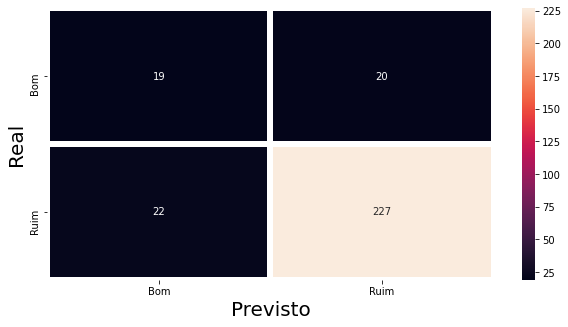

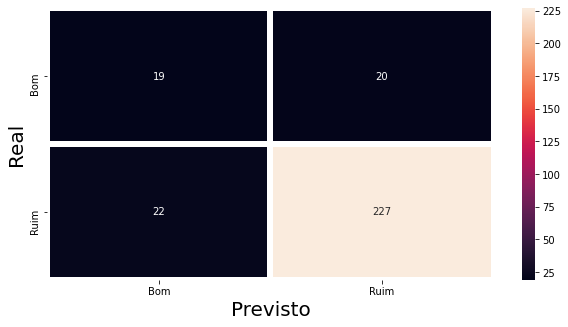

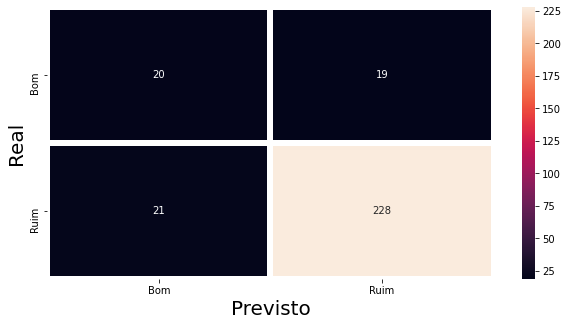

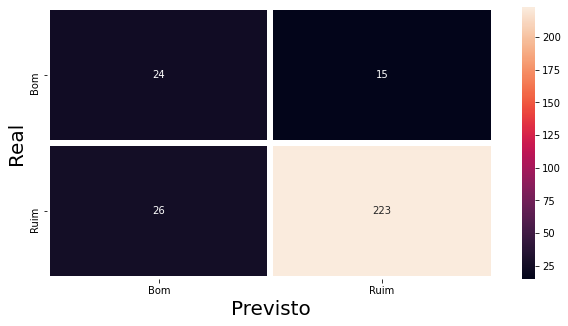

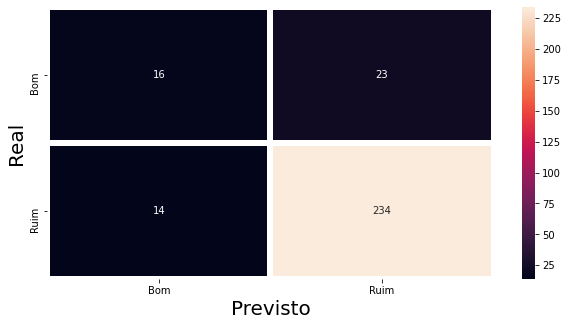

In [ ]:
# Fazendo com estratificação com 5 grupos
skf = StratifiedKFold(n_splits=5)
i=0
# Dividindo os dados proporcionalmente as classes
lista_modelos_NB = []
for train_index, test_index in skf.split(X, y_br):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_br_train, y_br_test = y_br.iloc[train_index], y_br.iloc[test_index]
  clf = GaussianNB()
  lista_modelos_NB.append(clf.fit(X_train,y_br_train))
  plt.figure(figsize = (10,5))
  cf_matrix = confusion_matrix(y_br_test,clf.predict(X_test))
  sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
  plt.xlabel('Previsto',fontsize=20)
  plt.ylabel('Real',fontsize=20)
  print('Modelo',i,': AUC: ',round(roc_auc_score(y_br_test, clf.predict_proba(X_test)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test, clf.predict(X_test)),4),
        'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))
  i+=1
  

melhor_NBGaussiano_sem_var_corr = lista_modelos_NB[3]


O melhor modelo bayes ingênuo gaussiano sem variáveis correlacionadas foi o modelo 3, de acordo com a métrica proporção de vinhos bons corretamente classificados.

Classificador LDA sem variáveis correlacionadas

Modelo 0 : AUC:  0.8492    Erro = 1 - acurácia: 0.1354 Proporção de vinhos bons corretamente classificados : 0.3333
Modelo 1 : AUC:  0.871    Erro = 1 - acurácia: 0.125 Proporção de vinhos bons corretamente classificados : 0.3846
Modelo 2 : AUC:  0.8753    Erro = 1 - acurácia: 0.1389 Proporção de vinhos bons corretamente classificados : 0.2821
Modelo 3 : AUC:  0.8763    Erro = 1 - acurácia: 0.1181 Proporção de vinhos bons corretamente classificados : 0.4103
Modelo 4 : AUC:  0.8963    Erro = 1 - acurácia: 0.1115 Proporção de vinhos bons corretamente classificados : 0.3333


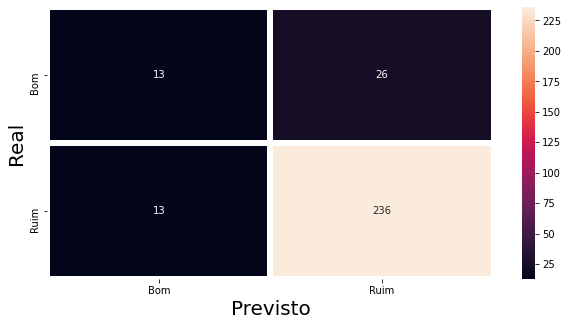

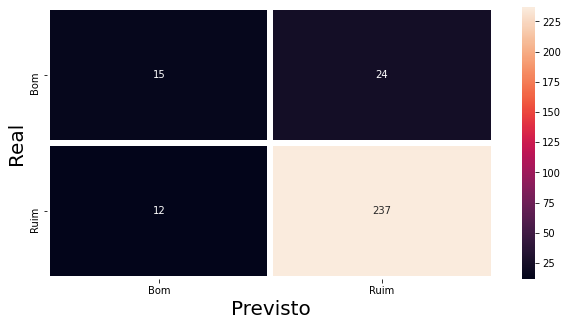

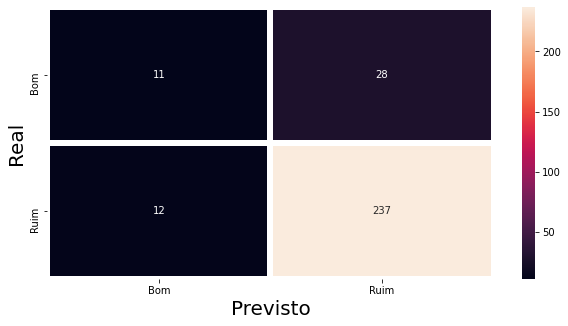

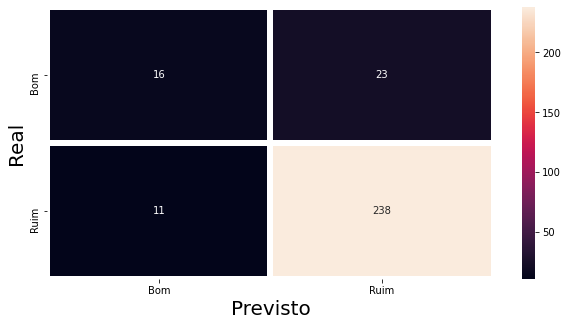

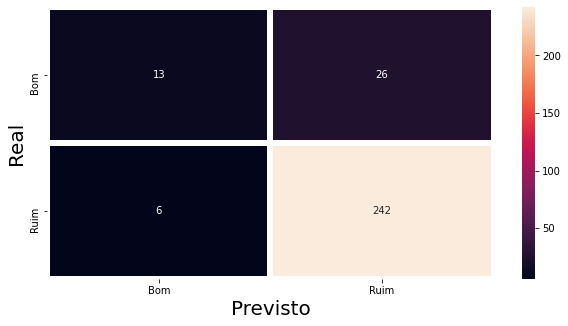

In [ ]:
# Fazendo com estratificação com 5 grupos
skf = StratifiedKFold(n_splits=5)
i=0
# Dividindo os dados proporcionalmente as classes
lista_modelos_LDA = []
for train_index, test_index in skf.split(X, y_br):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_br_train, y_br_test = y_br.iloc[train_index], y_br.iloc[test_index]
  clf = LinearDiscriminantAnalysis(store_covariance = True)
  lista_modelos_LDA.append(clf.fit(X_train,y_br_train))
  plt.figure(figsize = (10,5))
  cf_matrix = confusion_matrix(y_br_test,clf.predict(X_test))
  sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
  plt.xlabel('Previsto',fontsize=20)
  plt.ylabel('Real',fontsize=20)
  print('Modelo',i,': AUC: ',round(roc_auc_score(y_br_test, clf.predict_proba(X_test)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test, clf.predict(X_test)),4),
        'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))
  i+=1
  



melhor_LDA_sem_var_corr = lista_modelos_LDA[3]

O melhor LDA foi o modelo 3 também.

Classificador QDA sem variáveis correlacionadas

Modelo 0 : AUC:  0.8237    Erro = 1 - acurácia: 0.1215 Proporção de vinhos bons corretamente classificados : 0.4103
Modelo 1 : AUC:  0.8639    Erro = 1 - acurácia: 0.1389 Proporção de vinhos bons corretamente classificados : 0.4615
Modelo 2 : AUC:  0.8856    Erro = 1 - acurácia: 0.1354 Proporção de vinhos bons corretamente classificados : 0.3846
Modelo 3 : AUC:  0.8646    Erro = 1 - acurácia: 0.1319 Proporção de vinhos bons corretamente classificados : 0.4103
Modelo 4 : AUC:  0.9057    Erro = 1 - acurácia: 0.1045 Proporção de vinhos bons corretamente classificados : 0.5641


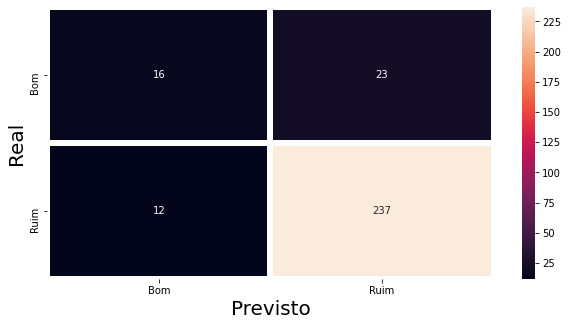

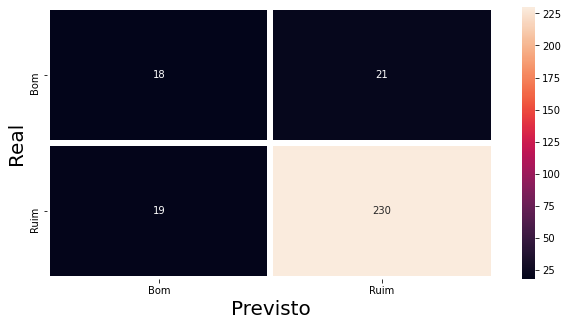

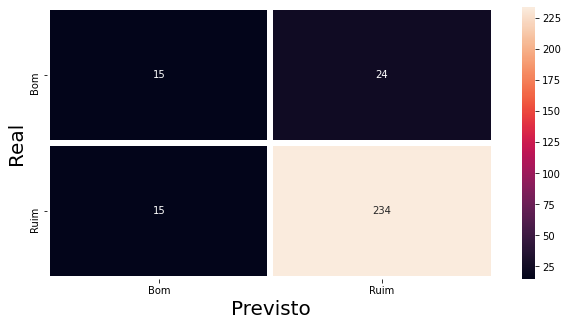

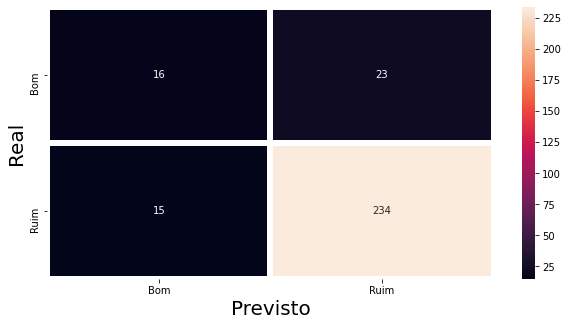

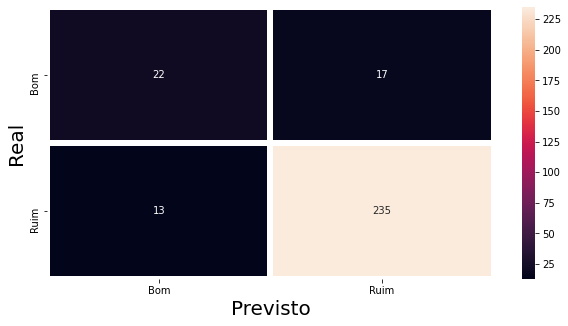

In [ ]:
# Fazendo com estratificação com 5 grupos
skf = StratifiedKFold(n_splits=5)
i=0
# Dividindo os dados proporcionalmente as classes
lista_modelos_QDA = []
for train_index, test_index in skf.split(X, y_br):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_br_train, y_br_test = y_br.iloc[train_index], y_br.iloc[test_index]
  clf = QuadraticDiscriminantAnalysis(store_covariance=True)
  lista_modelos_QDA.append(clf.fit(X_train,y_br_train))
  plt.figure(figsize = (10,5))
  cf_matrix = confusion_matrix(y_br_test,clf.predict(X_test))
  sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
  plt.xlabel('Previsto',fontsize=20)
  plt.ylabel('Real',fontsize=20)
  print('Modelo',i,': AUC: ',round(roc_auc_score(y_br_test, clf.predict_proba(X_test)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test, clf.predict(X_test)),4),
        'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))
  i+=1




melhor_QDA_sem_var_corr = lista_modelos_QDA[4]

O melhor modelo QDA foi o modelo 4.

**Comparando os 3 melhores classificadores sem variáveis correlacionadas entre si nos dados de teste**

Modelo NBG: AUC:  0.9038    Erro = 1 - acurácia: 0.1125 Proporção de vinhos bons corretamente classificados : 0.45454545454545453
Modelo LDA: AUC:  0.9002    Erro = 1 - acurácia: 0.1188 Proporção de vinhos bons corretamente classificados : 0.3181818181818182
Modelo QDA: AUC:  0.8979    Erro = 1 - acurácia: 0.1125 Proporção de vinhos bons corretamente classificados : 0.4090909090909091


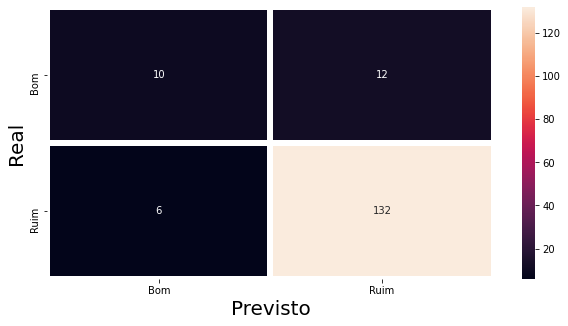

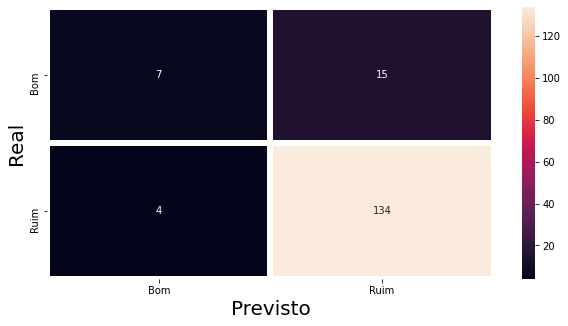

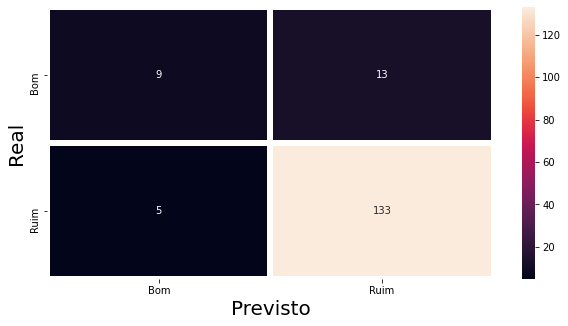

In [ ]:
# Bayes Ingênuo Gaussiano
plt.figure(figsize = (10,5))
cf_matrix_NB_sem_var_corr = confusion_matrix(y_br_test_Teste,melhor_NBGaussiano_sem_var_corr.predict(X_test_Teste))
sns.heatmap(cf_matrix_NB_sem_var_corr,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
plt.xlabel('Previsto',fontsize=20)
plt.ylabel('Real',fontsize=20)
print('Modelo NBG: AUC: ',round(roc_auc_score(y_br_test_Teste, melhor_NBGaussiano_sem_var_corr.predict_proba(X_test_Teste)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test_Teste, melhor_NBGaussiano_sem_var_corr.predict(X_test_Teste)),4),
      'Proporção de vinhos bons corretamente classificados :', cf_matrix_NB_sem_var_corr[0,0]/(cf_matrix_NB_sem_var_corr[0,0]+cf_matrix_NB_sem_var_corr[0,1]))

# LDA
plt.figure(figsize = (10,5))
cf_matrix_LDA_sem_var_corr = confusion_matrix(y_br_test_Teste,melhor_LDA_sem_var_corr.predict(X_test_Teste))
sns.heatmap(cf_matrix_LDA_sem_var_corr,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
plt.xlabel('Previsto',fontsize=20)
plt.ylabel('Real',fontsize=20)
print('Modelo LDA: AUC: ',round(roc_auc_score(y_br_test_Teste, melhor_LDA_sem_var_corr.predict_proba(X_test_Teste)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test_Teste, melhor_LDA_sem_var_corr.predict(X_test_Teste)),4),
      'Proporção de vinhos bons corretamente classificados :', cf_matrix_LDA_sem_var_corr[0,0]/(cf_matrix_LDA_sem_var_corr[0,0]+cf_matrix_LDA_sem_var_corr[0,1]))


# QDA
plt.figure(figsize = (10,5))
cf_matrix_QDA_sem_var_corr = confusion_matrix(y_br_test_Teste,melhor_QDA_sem_var_corr.predict(X_test_Teste))
sns.heatmap(cf_matrix_QDA_sem_var_corr,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
plt.xlabel('Previsto',fontsize=20)
plt.ylabel('Real',fontsize=20)
print('Modelo QDA: AUC: ',round(roc_auc_score(y_br_test_Teste, melhor_QDA_sem_var_corr.predict_proba(X_test_Teste)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test_Teste, melhor_QDA_sem_var_corr.predict(X_test_Teste)),4),
      'Proporção de vinhos bons corretamente classificados :', cf_matrix_QDA_sem_var_corr[0,0]/(cf_matrix_QDA_sem_var_corr[0,0]+cf_matrix_QDA_sem_var_corr[0,1]))



Dentre os classificadores sem variáveis correlacionadas o melhor foi o Bayes Ingênuo Gaussiano, pois ele teve maior proporção de vinhos bons corretamente classificados, 0.4545. Este ficou empatado com o modelo Bayes Ingênuo Gaussiano com todas as variáveis. Porém, como critério de desempate, o erro do Bayes Ingênuo Gaussiano sem variáveis correlacionadas foi menor (a acurácia foi maior) e, por isso, escolheríamos ele dentre os modelos propostos em questão.

**Só por curiosidade farei agora um classifcador com Redes Neurais (utilizando todas as variáveis)**

In [ ]:
# importando classifcador
from sklearn.neural_network import MLPClassifier

In [ ]:
# dividindo os dados em validação e teste
X, X_test_Teste, y_br, y_br_test_Teste = train_test_split(X_tq, y_br_todas, test_size=0.1, random_state=42, stratify = y_br_todas)

Modelo 0 : AUC:  0.861    Erro = 1 - acurácia: 0.1285 Proporção de vinhos bons corretamente classificados : 0.6154
Modelo 1 : AUC:  0.8645    Erro = 1 - acurácia: 0.1146 Proporção de vinhos bons corretamente classificados : 0.4615
Modelo 2 : AUC:  0.8624    Erro = 1 - acurácia: 0.125 Proporção de vinhos bons corretamente classificados : 0.5128
Modelo 3 : AUC:  0.8484    Erro = 1 - acurácia: 0.1285 Proporção de vinhos bons corretamente classificados : 0.5897
Modelo 4 : AUC:  0.8841    Erro = 1 - acurácia: 0.1185 Proporção de vinhos bons corretamente classificados : 0.641


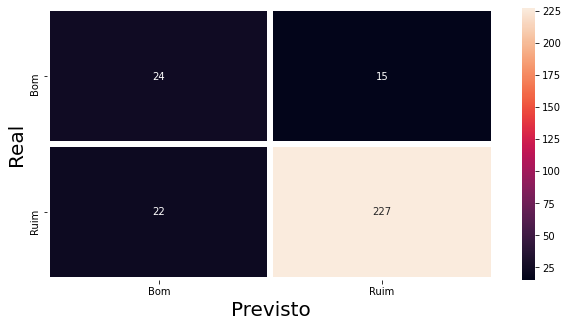

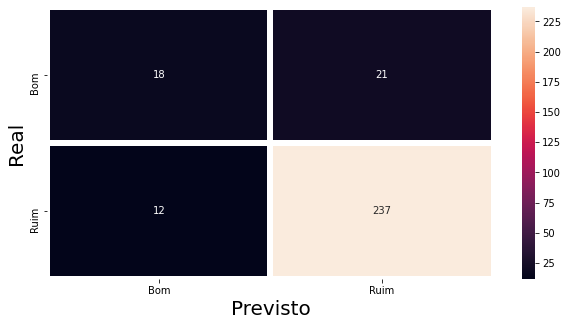

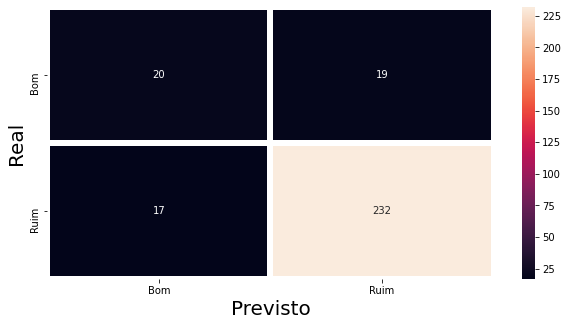

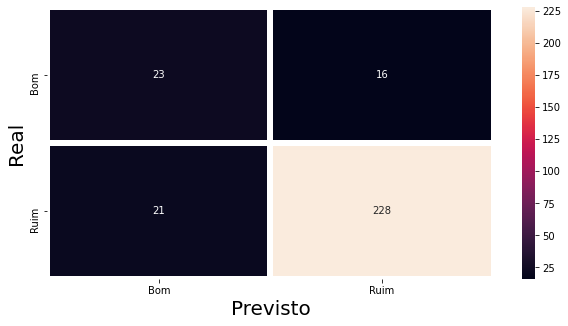

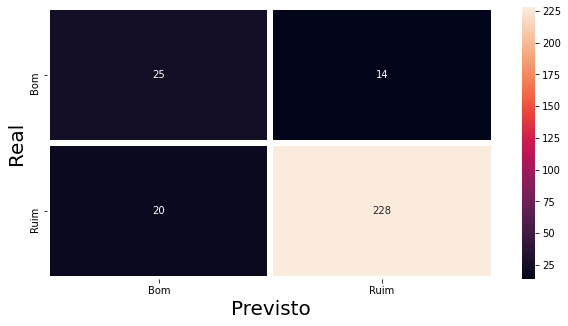

In [ ]:
# Fazendo com estratificação com 5 grupos
skf = StratifiedKFold(n_splits=5)
i=0
# Dividindo os dados proporcionalmente as classes
lista_modelos_NN = []
for train_index, test_index in skf.split(X, y_br):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_br_train, y_br_test = y_br.iloc[train_index], y_br.iloc[test_index]
  clf = MLPClassifier(random_state=1,solver='lbfgs',hidden_layer_sizes=(100,),max_iter = 800,activation='tanh')
  lista_modelos_NN.append(clf.fit(X_train,y_br_train))
  plt.figure(figsize = (10,5))
  cf_matrix = confusion_matrix(y_br_test,clf.predict(X_test))
  sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
  plt.xlabel('Previsto',fontsize=20)
  plt.ylabel('Real',fontsize=20)
  print('Modelo',i,': AUC: ',round(roc_auc_score(y_br_test, clf.predict_proba(X_test)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test, clf.predict(X_test)),4),
        'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))
  i+=1
  

melhor_NN = lista_modelos_NN[4]

O melhor modelo foi o 4, então usaremos ele para prever os dados de teste.


Melhor modelo NN: AUC:  0.8915    Erro = 1 - acurácia: 0.1 Proporção de vinhos bons corretamente classificados : 0.7273


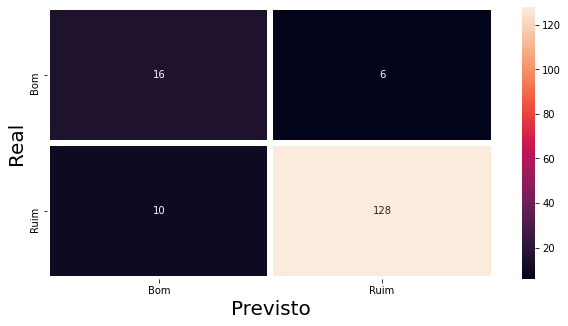

In [ ]:
# Usando o melhor classificador redes neurais encontrado na validação para prever os dados de teste
plt.figure(figsize = (10,5))
cf_matrix = confusion_matrix(y_br_test_Teste,clf.predict(X_test_Teste))
sns.heatmap(cf_matrix,annot=True,fmt='d',linewidths=5,xticklabels = ['Bom','Ruim'],yticklabels=['Bom','Ruim'])
plt.xlabel('Previsto',fontsize=20)
plt.ylabel('Real',fontsize=20)
print('Melhor modelo NN: AUC: ',round(roc_auc_score(y_br_test_Teste, clf.predict_proba(X_test_Teste)[:, 1]),4),'   Erro = 1 - acurácia:' , round(1 - metrics.accuracy_score(y_br_test_Teste, clf.predict(X_test_Teste)),4),
      'Proporção de vinhos bons corretamente classificados :', round(cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1]),4))


Pode-se ver que nos dados de teste a rede neural em questão teve proporção de vinhos bons corretamente classificados de 0.7273, um resultado melhor do que os outros classificadores (Bayes Ingênuo Gaussiano, LDA e QDA, com ou sem variáveis correlacionadas). Sendo assim, eu ficaria com a rede neural caso o objetivo fosse somente classificar os vinhos bons corretamente sem necessariamente entender quais variáveis implicam na melhor ou pior qualidade do vinho. Se este fosse o objetivo, talvez escolher o bayes ingênuo gaussiano fosse melhor já que ele possui melhor interpretabilidade.
Obs: pode-se considerar também o tempo de execução dos classificadores. A rede neural demorou consideravelmente mais tempo (por volta de 4 segundos, não fiz essa estimativa, apenas verifiquei o tempo de execução que aparece na parte inferior central da tela) enquanto os métodos bayes ingênuo gaussiano, LDA e QDA demoraram menos de 1 segundo para treinamento e estimação.

Obs: A proporção de vinhos bons corretamente classificados da rede neural nos dados de teste foi maior (0.7273) do que nos dados da validação cruzada (melhor foi 0.641), o que é meio estranho já que se espera que as métricas sejam em geral maiores na validação cruzada. No entanto, acredito que não tenha nenhum erro no algoritmo que possa estar ocasiando essa diferença e, por isso, decidi por manter a solução desta rede neural como sendo a melhor para o fim de classificar vinhos bons corretamente sem perder muito da acurácia.